<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/W11_CNNs_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install python-opencv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml

--2020-11-18 12:49:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411388 (402K) [text/plain]
Saving to: ‘haarcascade_frontalcatface.xml.1’

haarcascade_frontal 100%[===================>] 401.75K  --.-KB/s    in 0.05s   

2020-11-18 12:49:06 (8.33 MB/s) - ‘haarcascade_frontalcatface.xml.1’ saved [411388/411388]



In [ ]:
!wget https://storage.googleapis.com/penn-cis545/animal-image-datasetdog-cat-and-panda.zip

--2020-11-18 12:49:06--  https://penn-cis545-files.s3.amazonaws.com/animal-image-datasetdog-cat-and-panda.zip
Resolving penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)... 52.217.81.116
Connecting to penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)|52.217.81.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393866738 (376M) [application/zip]
Saving to: ‘animal-image-datasetdog-cat-and-panda.zip.1’

animal-image-datase 100%[===================>] 375.62M  36.1MB/s    in 11s     

2020-11-18 12:49:18 (33.7 MB/s) - ‘animal-image-datasetdog-cat-and-panda.zip.1’ saved [393866738/393866738]



In [ ]:
import zipfile
archive = zipfile.ZipFile('animal-image-datasetdog-cat-and-panda.zip')

for file in archive.namelist():
  if file.startswith('animals/cats/') or file.startswith('animals/panda/'):
    archive.extract(file)

In [ ]:
## Crudely set up training and test data
## by moving some of the cats + pandas
## to the train directory

!mkdir animals/training
!mkdir animals/test
!cp -r animals/cats animals/training
!cp -r animals/panda animals/training
!mkdir animals/test/cats
!mkdir animals/test/panda
!mv animals/training/cats/*_004* animals/test/cats/
!mv animals/training/panda/*_005* animals/test/panda

mkdir: cannot create directory ‘animals/training’: File exists
mkdir: cannot create directory ‘animals/test’: File exists
mkdir: cannot create directory ‘animals/test/cats’: File exists
mkdir: cannot create directory ‘animals/test/panda’: File exists


In [ ]:
!ls animals/test/cats

cats_00400.jpg	cats_00420.jpg	cats_00440.jpg	cats_00460.jpg	cats_00480.jpg
cats_00401.jpg	cats_00421.jpg	cats_00441.jpg	cats_00461.jpg	cats_00481.jpg
cats_00402.jpg	cats_00422.jpg	cats_00442.jpg	cats_00462.jpg	cats_00482.jpg
cats_00403.jpg	cats_00423.jpg	cats_00443.jpg	cats_00463.jpg	cats_00483.jpg
cats_00404.jpg	cats_00424.jpg	cats_00444.jpg	cats_00464.jpg	cats_00484.jpg
cats_00405.jpg	cats_00425.jpg	cats_00445.jpg	cats_00465.jpg	cats_00485.jpg
cats_00406.jpg	cats_00426.jpg	cats_00446.jpg	cats_00466.jpg	cats_00486.jpg
cats_00407.jpg	cats_00427.jpg	cats_00447.jpg	cats_00467.jpg	cats_00487.jpg
cats_00408.jpg	cats_00428.jpg	cats_00448.jpg	cats_00468.jpg	cats_00488.jpg
cats_00409.jpg	cats_00429.jpg	cats_00449.jpg	cats_00469.jpg	cats_00489.jpg
cats_00410.jpg	cats_00430.jpg	cats_00450.jpg	cats_00470.jpg	cats_00490.jpg
cats_00411.jpg	cats_00431.jpg	cats_00451.jpg	cats_00471.jpg	cats_00491.jpg
cats_00412.jpg	cats_00432.jpg	cats_00452.jpg	cats_00472.jpg	cats_00492.jpg
cats_00413.jpg	cats_00433

In [ ]:
!pip install imutils

Cat face detected...


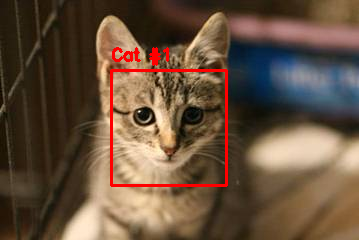

In [ ]:
# import the necessary packages
import argparse
import cv2
from google.colab.patches import cv2_imshow
 
# load the input image and convert it to grayscale
image = cv2.imread('animals/cats/cats_00198.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.3,
	minNeighbors=5, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
  print('Cat face detected...')
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
  
# show the detected cat faces
cv2_imshow(image)

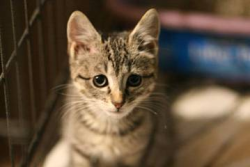

In [ ]:
import imutils

# load the input image and convert it to grayscale
image = cv2.imread('animals/cats/cats_00198.jpg')

# What is we shrink it a bit?
image2 = imutils.resize(image, width=250)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.3,
  minNeighbors=5, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
  print('Cat face detected...')
  cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.putText(image2, "Cat #{}".format(i + 1), (x, y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
  
# show the detected cat faces
cv2_imshow(image2)

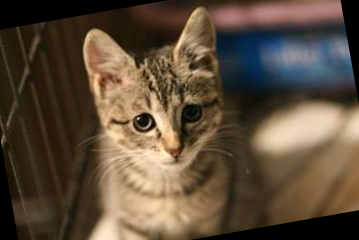

In [ ]:
import imutils

# load the input image and convert it to grayscale
image = cv2.imread('animals/cats/cats_00198.jpg')

# What is we rotate it a bit?
image2 = imutils.rotate(image, 10)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.3,
  minNeighbors=5, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
  print('Cat face detected...')
  cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.putText(image2, "Cat #{}".format(i + 1), (x, y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
  
# show the detected cat faces
cv2_imshow(image2)

# MxNet

For multi-GPU-cluster-based tasks, you'll want to use Gluon with mxnet.  

First, go into Edit | Notebook Settings and make sure you have enabled Hardware Accelerator - GPU.

We will be training our classifier to recognize (1) cats (class 0) and (2) pandas (class 1).  Our data comes from Kaggle:

https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

In [ ]:
!ls animals

cats  panda  test  training


In [ ]:
!pip install gluon mxnet-cu101

In [ ]:
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
from mxnet.gluon.data.vision import transforms
mx.random.seed(1)

import numpy as np

ctx = mx.gpu()

In [ ]:
def transform(image, label):
        # resize the shorter edge to 224, the longer edge will be greater or equal to 224
        resized = mx.image.resize_short(image, 224)
        # center and crop an area of size (224,224)
        cropped, crop_info = mx.image.center_crop(resized, (224, 224))
        # transpose the channels to be (3,224,224)
        transposed = mx.nd.transpose(cropped.astype(np.float32), (2, 0, 1))
        return transposed/255, float(label)

ds_train = mx.gluon.data.vision.datasets.ImageFolderDataset('animals/training', transform=transform)
ds_test = mx.gluon.data.vision.datasets.ImageFolderDataset('animals/test', transform=transform)

train_data = mx.gluon.data.DataLoader(ds_train, 4, shuffle=True)
test_data = mx.gluon.data.DataLoader(ds_test, 4, shuffle=False)

In [ ]:
# Now let's create the model, https://gluon.mxnet.io/chapter04_convolutional-neural-networks/very-deep-nets-vgg.html
from mxnet.gluon import nn

def vgg_block(num_convs, channels):
    out = nn.Sequential()
    for _ in range(num_convs):
        out.add(nn.Conv2D(channels=channels, kernel_size=3,
                      padding=1, activation='relu'))
    out.add(nn.MaxPool2D(pool_size=2, strides=2))
    return out

def vgg_stack(architecture):
    out = nn.Sequential()
    for (num_convs, channels) in architecture:
        out.add(vgg_block(num_convs, channels))
    return out

num_outputs = 2
architecture = ((1,64), (1,128), (2,256), (2,512))
net = nn.Sequential()
with net.name_scope():
    net.add(vgg_stack(architecture))
    net.add(nn.Flatten())
    net.add(nn.Dense(512, activation="relu"))
    net.add(nn.Dropout(.5))
    net.add(nn.Dense(512, activation="relu"))
    net.add(nn.Dropout(.5))
    net.add(nn.Dense(num_outputs))

In [ ]:
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': .001})

In [ ]:
net

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2D(None -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
      (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    )
    (1): Sequential(
      (0): Conv2D(None -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
      (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    )
    (2): Sequential(
      (0): Conv2D(None -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
      (1): Conv2D(None -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
      (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    )
    (3): Sequential(
      (0): Conv2D(None -> 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [ ]:
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

In [ ]:
epochs = 15
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(data.shape[0])

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss)

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, moving_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 0.6919451289913506, Train_acc 0.5127777777777778, Test_acc 0.525
Epoch 1. Loss: 0.6891679247667493, Train_acc 0.7844444444444445, Test_acc 0.775
Epoch 2. Loss: 0.6847822937150858, Train_acc 0.7477777777777778, Test_acc 0.735
Epoch 3. Loss: 0.6722319195293872, Train_acc 0.7283333333333334, Test_acc 0.705
Epoch 4. Loss: 0.6311739584726692, Train_acc 0.7444444444444445, Test_acc 0.76
Epoch 5. Loss: 0.5664286077740599, Train_acc 0.7472222222222222, Test_acc 0.755
Epoch 6. Loss: 0.5041905546755925, Train_acc 0.7827777777777778, Test_acc 0.78
Epoch 7. Loss: 0.47828157058394744, Train_acc 0.7927777777777778, Test_acc 0.78
Epoch 8. Loss: 0.4723779190205292, Train_acc 0.7972222222222223, Test_acc 0.815
Epoch 9. Loss: 0.4214140654444077, Train_acc 0.8288888888888889, Test_acc 0.83
Epoch 10. Loss: 0.3825471304753024, Train_acc 0.8266666666666667, Test_acc 0.84
Epoch 11. Loss: 0.3278085185506113, Train_acc 0.8711111111111111, Test_acc 0.865
Epoch 12. Loss: 0.324754715083082, Train_a

In [ ]:
net.save_parameters('cats.params')

In [ ]:
!wget https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/WALN4MAIT4I6VLRIPUMJQAJIME.jpg

--2020-11-18 13:06:52--  https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/WALN4MAIT4I6VLRIPUMJQAJIME.jpg
Resolving arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)... 52.216.251.156
Connecting to arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)|52.216.251.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 989738 (967K) [image/jpeg]
Saving to: ‘WALN4MAIT4I6VLRIPUMJQAJIME.jpg’

WALN4MAIT4I6VLRIPUM 100%[===================>] 966.54K  1.91MB/s    in 0.5s    

2020-11-18 13:06:53 (1.91 MB/s) - ‘WALN4MAIT4I6VLRIPUMJQAJIME.jpg’ saved [989738/989738]



In [ ]:
!wget https://deadline.com/wp-content/uploads/2019/12/cats-2-1.jpg?w=681&h=383&crop=1
!mv 'cats-2-1.jpg?w=681' 'cats-2.1.jpg'

--2020-11-18 13:06:55--  https://deadline.com/wp-content/uploads/2019/12/cats-2-1.jpg?w=681
Resolving deadline.com (deadline.com)... 192.0.66.32
Connecting to deadline.com (deadline.com)|192.0.66.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35263 (34K) [image/jpeg]
Saving to: ‘cats-2-1.jpg?w=681’

cats-2-1.jpg?w=681  100%[===================>]  34.44K  --.-KB/s    in 0.001s  

2020-11-18 13:06:55 (36.6 MB/s) - ‘cats-2-1.jpg?w=681’ saved [35263/35263]



In [ ]:
!wget https://www.rd.com/wp-content/uploads/2019/05/American-shorthair-cat.jpg

--2020-11-18 13:06:56--  https://www.rd.com/wp-content/uploads/2019/05/American-shorthair-cat.jpg
Resolving www.rd.com (www.rd.com)... 104.18.24.214, 104.18.25.214, 2606:4700::6812:18d6, ...
Connecting to www.rd.com (www.rd.com)|104.18.24.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1292543 (1.2M) [image/jpeg]
Saving to: ‘American-shorthair-cat.jpg’

American-shorthair- 100%[===================>]   1.23M  --.-KB/s    in 0.08s   

2020-11-18 13:06:56 (15.6 MB/s) - ‘American-shorthair-cat.jpg’ saved [1292543/1292543]



In [ ]:
!ls -l

total 991796
-rw-r--r-- 1 root root    108037 Oct 22  2013 800px-Grosser_Panda.JPG
-rw-r--r-- 1 root root   1292543 Nov 18 13:06 American-shorthair-cat.jpg
-rw-r--r-- 1 root root 393866738 Apr  9  2020 animal-image-datasetdog-cat-and-panda.zip
-rw-r--r-- 1 root root 393866738 Apr  9  2020 animal-image-datasetdog-cat-and-panda.zip.1
drwxr-xr-x 6 root root      4096 Nov 18 12:12 animals
-rw-r--r-- 1 root root     35263 Nov 18 12:21 cats-2.1.jpg
-rw-r--r-- 1 root root 224582222 Nov 18 13:06 cats.params
-rw-r--r-- 1 root root    411388 Nov 18 12:12 haarcascade_frontalcatface.xml
-rw-r--r-- 1 root root    411388 Nov 18 12:49 haarcascade_frontalcatface.xml.1
drwxr-xr-x 4 root root      4096 Nov 18 12:28 learned-vgg16.tf
drwxr-xr-x 3 root root      4096 Nov 18 12:44 sample
drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data
-rw-r--r-- 1 root root    989738 Nov 22  2019 WALN4MAIT4I6VLRIPUMJQAJIME.jpg


In [ ]:
!mkdir sample
!mkdir sample/cats
!mv *.jpg sample/cats

mkdir: cannot create directory ‘sample’: File exists
mkdir: cannot create directory ‘sample/cats’: File exists


In [ ]:
!ls -l sample/cats

total 2268
-rw-r--r-- 1 root root 1292543 Nov 18 13:06 American-shorthair-cat.jpg
-rw-r--r-- 1 root root   35263 Nov 18 12:21 cats-2.1.jpg
-rw-r--r-- 1 root root  989738 Nov 22  2019 WALN4MAIT4I6VLRIPUMJQAJIME.jpg


In [ ]:
ds_new = mx.gluon.data.vision.datasets.ImageFolderDataset('sample', transform=transform)

cat_data = mx.gluon.data.DataLoader(ds_new, 1, shuffle=False)

In [ ]:
preds = []
for i, (data, label) in enumerate(cat_data):
    data = data.as_in_context(ctx)
    pred = net(data).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

# Class 0 = cats, class 1 = pandas
print (preds)

[0, 0, 0]


# Let's Do Transfer Learning

We'll take pretrained VGG-16 instead.

In [ ]:
from mxnet.gluon.model_zoo import vision

model_name = 'ResNet50_v2'
finetune_net = vision.get_model(model_name, pretrained=True)
with finetune_net.name_scope():
    finetune_net.output = nn.Dense(2)
finetune_net.output.initialize(mx.init.Xavier(), ctx = ctx)
finetune_net.collect_params().reset_ctx(ctx)
finetune_net.hybridize()

trainer = gluon.Trainer(finetune_net.collect_params(), 'sgd', {
                        'learning_rate': 0.001})
metric = mx.metric.Accuracy()
L = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
def test(net, val_data, ctx):
    metric = mx.metric.Accuracy()
    for i, batch in enumerate(val_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
        outputs = [net(X) for X in data]
        metric.update(label, outputs)

    return metric.get()

In [ ]:
import time

lr_counter = 0
num_batch = len(train_data)

for epoch in range(epochs):
    tic = time.time()
    train_loss = 0
    metric.reset()

    for i, batch in enumerate(train_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=[ctx], batch_axis=0, even_split=False)
        label = gluon.utils.split_and_load(batch[1], ctx_list=[ctx], batch_axis=0, even_split=False)
        with autograd.record():
            outputs = [finetune_net(X) for X in data]
            loss = [L(yhat, y) for yhat, y in zip(outputs, label)]
        for l in loss:
            l.backward()

        trainer.step(4)
        train_loss += sum([l.mean().asscalar() for l in loss]) / len(loss)

        metric.update(label, outputs)

    _, train_acc = metric.get()
    train_loss /= num_batch

    _, test_acc = test(finetune_net, test_data, [ctx])

    print('[Epoch %d] Train-acc: %.3f, loss: %.3f | Val-acc: %.3f | time: %.1f' %
             (epoch, train_acc, train_loss, test_acc, time.time() - tic))

_, test_acc = test(finetune_net, test_data, [ctx])
print('[Finished] Test-acc: %.3f' % (test_acc))

[Epoch 0] Train-acc: 0.889, loss: 0.287 | Val-acc: 1.000 | time: 32.7
[Epoch 1] Train-acc: 0.924, loss: 0.179 | Val-acc: 1.000 | time: 30.6
[Epoch 2] Train-acc: 0.933, loss: 0.178 | Val-acc: 1.000 | time: 30.6
[Epoch 3] Train-acc: 0.933, loss: 0.177 | Val-acc: 1.000 | time: 30.0
[Epoch 4] Train-acc: 0.919, loss: 0.177 | Val-acc: 1.000 | time: 31.3
[Epoch 5] Train-acc: 0.931, loss: 0.157 | Val-acc: 1.000 | time: 31.8
[Epoch 6] Train-acc: 0.937, loss: 0.142 | Val-acc: 1.000 | time: 32.3
[Epoch 7] Train-acc: 0.947, loss: 0.111 | Val-acc: 1.000 | time: 32.0
[Epoch 8] Train-acc: 0.942, loss: 0.134 | Val-acc: 1.000 | time: 32.2
[Epoch 9] Train-acc: 0.936, loss: 0.129 | Val-acc: 1.000 | time: 31.6
[Epoch 10] Train-acc: 0.934, loss: 0.142 | Val-acc: 1.000 | time: 31.3
[Epoch 11] Train-acc: 0.950, loss: 0.117 | Val-acc: 1.000 | time: 31.4
[Epoch 12] Train-acc: 0.944, loss: 0.117 | Val-acc: 1.000 | time: 31.6
[Epoch 13] Train-acc: 0.943, loss: 0.126 | Val-acc: 1.000 | time: 31.7
[Epoch 14] Train

Can we recognize cats and pandas?

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG

--2020-11-18 13:17:45--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108037 (106K) [image/jpeg]
Saving to: ‘800px-Grosser_Panda.JPG.1’

800px-Grosser_Panda 100%[===================>] 105.50K  --.-KB/s    in 0.01s   

2020-11-18 13:17:45 (8.50 MB/s) - ‘800px-Grosser_Panda.JPG.1’ saved [108037/108037]



In [ ]:
!mkdir sample/panda
!mv 800px-Grosser_Panda.JPG sample/panda

In [ ]:
ds_new = mx.gluon.data.vision.datasets.ImageFolderDataset('sample', transform=transform)

cat_panda_data = mx.gluon.data.DataLoader(ds_new, 1, shuffle=False)

In [ ]:
preds = []
for i, (data, label) in enumerate(cat_panda_data):
    data = data.as_in_context(ctx)
    pred = net(data).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

# 0 = cats, 1 = panda
# Should be 0, 0, 0, 1
print (preds)

[0, 0, 0, 1]


An alternative: Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(224,224,3))

output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False



In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# add new classifier layers
class1 = Dense(1024, activation='relu')(vgg_model.output)
output = Dense(2, activation='softmax')(class1)
# define new model
adapted_model = Model(inputs=vgg_model.inputs, outputs=output)

adapted_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

adapted_model.summary()

In [ ]:
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

training_data_gen = ImageDataGenerator()
training_data = training_data_gen.flow_from_directory(directory='animals/training',\
                                                      target_size=(224,224))


test_data_gen = ImageDataGenerator()
test_data = test_data_gen.flow_from_directory(directory='animals/test',\
                                                      target_size=(224,224))

In [ ]:
history = adapted_model.fit_generator(steps_per_epoch=100,generator=training_data, \
                           validation_data= test_data, validation_steps=10,
                           epochs=10)

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG

# Does it recognize a panda from Wikipedia?

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

img_path = 'sample/panda/800px-Grosser_Panda.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = adapted_model.predict(x)
preds

In [ ]:
from tensorflow.keras.models import save_model

save_model(adapted_model, 'learned-vgg16.tf')

# Converting Models

The ONNX standard now exists as a bridge between different ML platforms, and is used for specifying models in a cross-platform way. Here we see that we can go from Keras+Tensorflow to Mxnet.

In [ ]:
!pip install -U tf2onnx

In [ ]:
# Looks like this temporarily doesn't work...
!python -m tf2onnx.convert --saved-model learned-vgg16.tf --output learned-vgg16.onnx

In [ ]:
!pip install onnx

In [ ]:
!pip install mxnet

In [ ]:
import numpy as np
import mxnet as mx
import mxnet.contrib.onnx as onnx_mxnet

sym, arg, aux = onnx_mxnet.import_model('learned-vgg16.onnx')

In [ ]:
mx.viz.plot_network(sym, node_attrs={"shape":"oval","fixedsize":"false"})